<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.

## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

Try a variety of response variables. Start with **MEDV** (the `.target` attribute from the dataset load method).

In [2]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
# A:

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [14]:
#print(boston.DESCR)  

In [15]:
df = pd.DataFrame(boston.data, columns= boston.feature_names)

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [20]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


R2-score:  0.5796329378833424


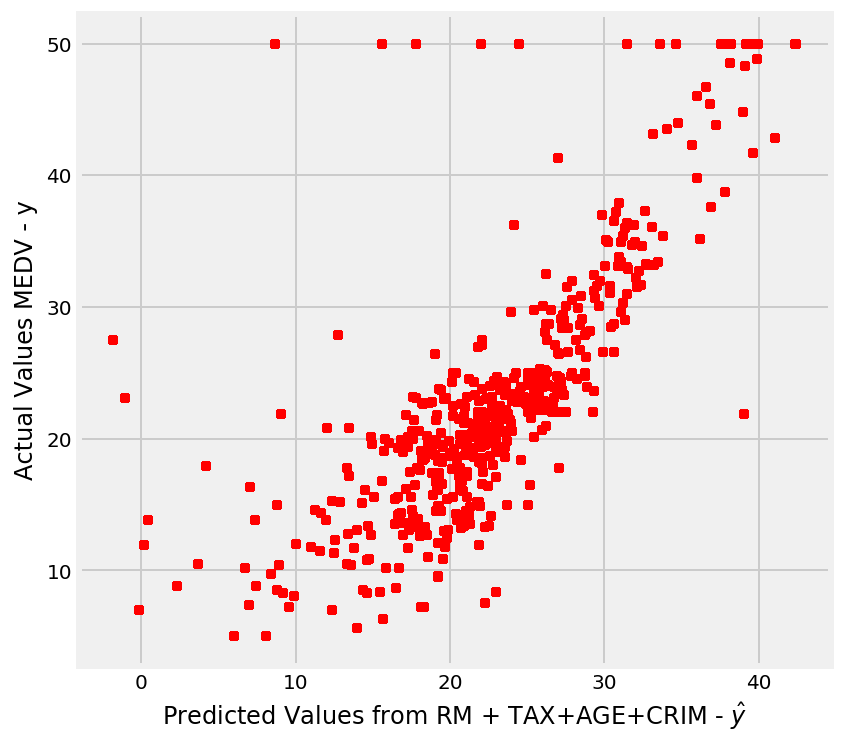

In [30]:
target = boston.target
df['MEDV'] = target

X= df[["RM","TAX","AGE","CRIM"]]
y = target
model = LinearRegression()
model.fit(X, y)

predictions  =  model.predict(X)
score        =  model.score(X, y)
print("R2-score: ", score)

plt.figure(figsize=(6,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM + TAX+AGE+CRIM - $\hat{y}$")
plt.ylabel("Actual Values MEDV - y")
plt.show()




In [31]:
print(model.coef_)   # What is the order of coef???

[ 7.76912247 -0.00935683 -0.03421541 -0.12971406]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
slr = LinearRegression()
slr.fit(X_train, y_train)
print(slr.score(X_train, y_train))
print(slr.score(X_test, y_test))

predictions = train_test_split(slr, X, y)

plt.figure(figsize=(6,6))
point_1 = [10, 50]
plt.plot(point_1, point_1)
plt.scatter(y, predictions)
plt.show()

(253, 4) (253,)
(253, 4) (253,)
0.5720552443134157
0.5802689618122345


TypeError: Singleton array array(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), dtype=object) cannot be considered a valid collection.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.495, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
slr = LinearRegression()
slr.fit(X_train, y_train)
print(slr.score(X_train, y_train))
print(slr.score(X_test, y_test))

(255, 4) (255,)
(251, 4) (251,)
0.5731629484081193
0.5792292666789975


### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

slr = LinearRegression()
slr.fit(X_train, y_train)
print(slr.score(X_train, y_train))
print(slr.score(X_test, y_test))

(151, 4) (151,)
(355, 4) (355,)
0.5140500268826154
0.5921851495844739


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

slr = LinearRegression()
slr.fit(X_train, y_train)
print(slr.score(X_train, y_train))
print(slr.score(X_test, y_test))

(50, 4) (50,)
(456, 4) (456,)
0.7703328913138819
0.5299331847976863


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

slr = LinearRegression()
slr.fit(X_train, y_train)
print(slr.score(X_train, y_train))
print(slr.score(X_test, y_test))

(354, 4) (354,)
(152, 4) (152,)
0.5259018216254814
0.6741961335188895


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

slr = LinearRegression()
slr.fit(X_train, y_train)
print(slr.score(X_train, y_train))
print(slr.score(X_test, y_test))

(455, 4) (455,)
(51, 4) (51,)
0.5730851702310351
0.6301377681676117


### 4. Try K-Fold cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [7]:
# A:I can loop here.

In [55]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


In [56]:
scores = cross_val_score(slr, X, y, cv=5)
print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())


Cross-validated scores: [ 0.57203587  0.65908578  0.59045754 -0.24661026 -0.95301628]
Mean of Ccoss-validated scores: 0.12439052915578504


ValueError: x and y must be the same size

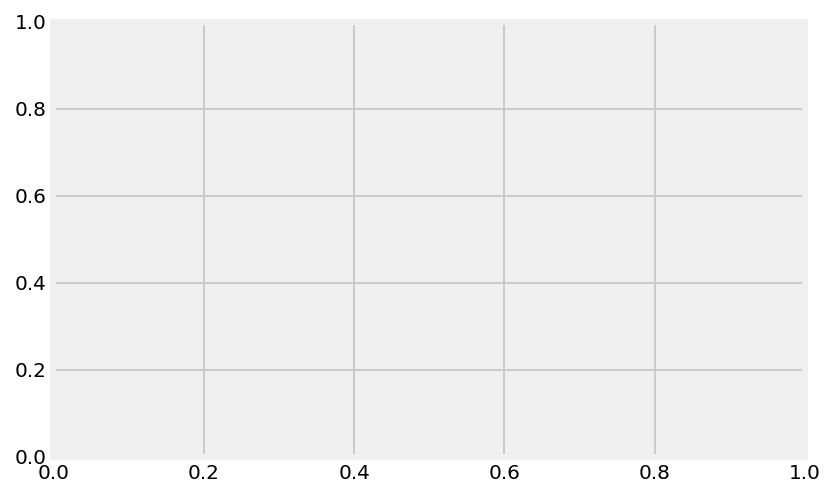

In [57]:
plt.scatter(X.values, predictions)
plt.show()


In [65]:
from sklearn.model_selection import KFold

cores = cross_val_score(slr, X, y, cv=KFold(n_splits=5))
print("Cross-validated scores:", scores)
print("Mean cross-validated scores:", scores.mean())


Cross-validated scores: [ 0.57203587  0.65908578  0.59045754 -0.24661026 -0.95301628]
Mean cross-validated scores: 0.12439052915578504


In [66]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)


In [68]:
for train_index, test_index in kf.split(X):
    for k in range(1,kf.get_n_splits(X)): 
        print("k:",k, "TRAIN:", train_index, "TEST:", test_index


SyntaxError: unexpected EOF while parsing (<ipython-input-68-cea81d8f44e3>, line 3)

### 5. [Bonus] Optimize the $R^2$ score

Can you optimize your $R^2$ by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [8]:
# A:

### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [10]:
import patsy

# A: